# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [134]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [135]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")


In [136]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [137]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='Bitcoin', language='en')

def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

btc_en_df = create_df(btc_news["articles"], "en")

In [138]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='Ethereum', language='en')
eth_en_df = create_df(eth_news["articles"], "en")
eth_en_df



,title,description,text,date,language
0,US blames North Korean hacker group for $625 m...,The US Department of Treasury has attributed t...,The US Department of Treasury says Lazarus is ...,2022-04-14,en
1,Wikipedia community votes to stop accepting cr...,Critics argue the bitcoin and ethereum network...,"18 with 15 posters participating, including st...",2022-04-13,en
2,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,2022-05-10,en
3,Opera's crypto browser is now available on iOS,"Opera launched its dedicated ""Crypto Browser"" ...","Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15,en
4,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,2022-05-02,en
5,How Bored Ape Yacht Club Broke Ethereum - CNET,"Transactions stalled for hours, and people pai...",When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,en
6,Jailed US Ethereum developer sets example for ...,An Ethereum developer was sentenced to more th...,The news: A former developer of the cryptocurr...,2022-04-14,en
7,Cryptoverse: Ether prepares for epic 'merge' i...,Ether has promised to do better. It has promis...,April 26 (Reuters) - Ether has promised to do ...,2022-04-26,en
8,What is the Ethereum merge and how could it ma...,Ethereum is preparing for an upgrade that’s be...,Ethereum is preparing for an upgrade thats bee...,2022-04-26,en
9,You Can Now Go See Fantastic Beasts With Dogec...,Dogecoiners unite! Movie theater chain AMC has...,Dogecoiners unite! Movie theater chain AMC has...,2022-04-18,en


In [139]:
# Create the Bitcoin sentiment scores DataFrame
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


# Sentiment scores dictionaries
btc_title_sent = {
    "Compound": [],
    "Negative": [],
    "Neutral": [],
    "Positive": [],
    "title_sent": [],
}
btc_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in btc_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        btc_title_sent["Compound"].append(title_sentiment["compound"])
        btc_title_sent["Negative"].append(title_sentiment["neg"])
        btc_title_sent["Neutral"].append(title_sentiment["neu"])
        btc_title_sent["Positive"].append(title_sentiment["pos"])
        btc_title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        btc_text_sent["text_compound"].append(text_sentiment["compound"])
        btc_text_sent["text_pos"].append(text_sentiment["pos"])
        btc_text_sent["text_neu"].append(text_sentiment["neu"])
        btc_text_sent["text_neg"].append(text_sentiment["neg"])
        btc_text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass


title_sentiment_df = pd.DataFrame(btc_title_sent)
text_sentiment_df = pd.DataFrame(btc_text_sent)
btc_news_en_df = btc_en_df.join(title_sentiment_df).join(text_sentiment_df)
btc_news_en_df.head()

,title,description,text,date,language,Compound,Negative,Neutral,Positive,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...","Now, even though there are a number of women-f...",2022-05-10,en,-0.5423,0.368,0.632,0.000,-1,0.0772,0.036,0.964,0.000,1
1,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,A Bitcoin mining site powered by otherwise los...,2022-05-04,en,0.0000,0.000,1.000,0.000,0,-0.0516,0.056,0.882,0.061,-1
2,Wikipedia editors vote to block cryptocurrency...,Wikipedia editors have voted in favor of dropp...,Wikipedia editors have voted in favor of dropp...,2022-04-14,en,-0.4404,0.326,0.674,0.000,-1,0.4019,0.088,0.912,0.000,1
3,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,Warren Buffett has always been a bitcoin skept...,2022-05-02,en,0.0000,0.000,1.000,0.000,0,-0.3269,0.085,0.772,0.143,-1
4,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,en,0.3400,0.000,0.745,0.255,1,0.3400,0.072,0.928,0.000,1


In [140]:
# Create the Ethereum sentiment scores DataFrame
# Sentiment scores dictionaries
eth_title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
eth_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in eth_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        eth_title_sent["title_compound"].append(title_sentiment["compound"])
        eth_title_sent["title_pos"].append(title_sentiment["pos"])
        eth_title_sent["title_neu"].append(title_sentiment["neu"])
        eth_title_sent["title_neg"].append(title_sentiment["neg"])
        eth_title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        eth_text_sent["text_compound"].append(text_sentiment["compound"])
        eth_text_sent["text_pos"].append(text_sentiment["pos"])
        eth_text_sent["text_neu"].append(text_sentiment["neu"])
        eth_text_sent["text_neg"].append(text_sentiment["neg"])
        eth_text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass


title_sentiment_df = pd.DataFrame(eth_title_sent)
text_sentiment_df = pd.DataFrame(eth_text_sent)
eth_news_en_df = eth_en_df.join(title_sentiment_df).join(text_sentiment_df)
eth_news_en_df.head()    

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,US blames North Korean hacker group for $625 m...,The US Department of Treasury has attributed t...,The US Department of Treasury says Lazarus is ...,2022-04-14,en,-0.4019,0.000,0.803,0.197,-1,-0.7845,0.088,0.681,0.231,-1
1,Wikipedia community votes to stop accepting cr...,Critics argue the bitcoin and ethereum network...,"18 with 15 posters participating, including st...",2022-04-13,en,0.1027,0.241,0.556,0.204,1,0.1027,0.084,0.844,0.071,1
2,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,2022-05-10,en,0.3612,0.294,0.706,0.000,1,0.6486,0.135,0.865,0.000,1
3,Opera's crypto browser is now available on iOS,"Opera launched its dedicated ""Crypto Browser"" ...","Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15,en,0.0000,0.000,1.000,0.000,0,0.7351,0.188,0.812,0.000,1
4,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,2022-05-02,en,0.2023,0.167,0.833,0.000,1,-0.2263,0.046,0.879,0.075,-1


In [141]:
# Describe the Bitcoin Sentiment
btc_news_en_df.describe()

,Compound,Negative,Neutral,Positive,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,-0.025985,0.07730,0.860500,0.06225,0.000000,0.001020,0.06885,0.866550,0.064600,0.000000
std,0.253560,0.13021,0.184475,0.11165,0.648886,0.384953,0.06443,0.088577,0.059824,1.025978
min,-0.542300,0.00000,0.396000,0.00000,-1.000000,-0.549900,0.00000,0.557000,0.000000,-1.000000
25%,-0.006450,0.00000,0.751000,0.00000,0.000000,-0.335475,0.00000,0.842500,0.000000,-1.000000
50%,0.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.07400,0.885000,0.063000,0.000000
75%,0.000000,0.13800,1.000000,0.05125,0.000000,0.254725,0.08500,0.923000,0.077250,1.000000
max,0.557400,0.36800,1.000000,0.29700,1.000000,0.750600,0.20200,0.964000,0.241000,1.000000


In [142]:
# Describe the Ethereum Sentiment
eth_news_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.066430,0.047450,0.869950,0.082650,-0.100000,-0.081860,0.053050,0.877900,0.069000,-0.250000
std,0.288289,0.099574,0.151941,0.127613,0.718185,0.481385,0.064728,0.074939,0.072897,0.966546
min,-0.599400,0.000000,0.550000,0.000000,-1.000000,-0.784500,0.000000,0.681000,0.000000,-1.000000
25%,-0.273200,0.000000,0.786000,0.000000,-1.000000,-0.381800,0.000000,0.827250,0.000000,-1.000000
50%,0.000000,0.000000,0.920000,0.000000,0.000000,-0.273200,0.023000,0.899500,0.063000,-1.000000
75%,0.000000,0.000000,1.000000,0.198750,0.000000,0.303775,0.085000,0.935500,0.077750,1.000000
max,0.557400,0.294000,1.000000,0.450000,1.000000,0.735100,0.188000,1.000000,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC Mean Positive Score = 0.0396 in titles, 0.0685 in text; Whereas, ETH Mean Positive Score = 0.0523 in titles and 0.0710. Therefore, Eth has the Highest Mean Positive Score.

Q: Which coin had the highest compound score?

A: BTC has a Compound Score = 0.5574 in titles and 0.750 in text; Whereas, Eth had a Compound Score = 0.5574 in titles and 0.9327 in text. Therefore, overall, Eth has the Highest Compound Score.

Q. Which coin had the highest positive score?

A: BTC had the following Positive Scores:


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [143]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [144]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary


In [145]:
# Complete the tokenizer function
def tokenizer(doc):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(doc))
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)  

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
       
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]

    # Remove the stop words
    
    return tokens

In [146]:
# Create a new tokens column for Bitcoin
processed_btc = tokenizer(btc_en_df)
processed_btc



['title',
 'miamis',
 'bitcoin',
 'conference',
 'left',
 'trail',
 'har',
 'fossil',
 'fuel',
 'company',
 'see',
 'green',
 'bitcoin',
 'wikipedia',
 'editor',
 'vote',
 'block',
 'cryptocurrency',
 'warren',
 'buffett',
 'says',
 'wouldnt',
 'take',
 'b',
 'bitcoin',
 'value',
 'drop',
 'since',
 'november',
 'peak',
 'fidelity',
 'wants',
 'include',
 'bitcoin',
 'k',
 'pl',
 'us',
 'treasury',
 'issue',
 'firstever',
 'sanction',
 'agains',
 'cryptoverse',
 'billion',
 'reason',
 'bitcoin',
 'could',
 'block',
 'aim',
 'simplify',
 'bitcoin',
 'investing',
 'wikipedia',
 'community',
 'vote',
 'stop',
 'accepting',
 'cr',
 'bitcoin',
 'ethereum',
 'technical',
 'analysis',
 'btc',
 'slip',
 'bitcoin',
 'last',
 'reuterscom',
 'bitcoin',
 'last',
 'reuterscom',
 'cryptoverse',
 'rising',
 'interest',
 'hurt',
 'bitcoin',
 'r',
 'bitcoin',
 'fall',
 'reuterscom',
 'bitcoin',
 'fall',
 'reuters',
 'go',
 'see',
 'fantastic',
 'beasts',
 'dogec',
 'terras',
 'crypto',
 'meltdown',
 'i

In [147]:
# Create a new tokens column for Ethereum
processed_eth = tokenizer(eth_en_df)
processed_eth

['title',
 'us',
 'blame',
 'north',
 'korean',
 'hacker',
 'group',
 'wikipedia',
 'community',
 'vote',
 'stop',
 'accepting',
 'cr',
 'heres',
 'nfts',
 'look',
 'like',
 'instagram',
 'operas',
 'crypto',
 'browser',
 'available',
 'ios',
 'yuga',
 'labs',
 'apologises',
 'sale',
 'virtual',
 'lan',
 'bored',
 'ape',
 'yacht',
 'club',
 'broke',
 'ethereum',
 'cnet',
 'jailed',
 'us',
 'ethereum',
 'developer',
 'set',
 'example',
 'cryptoverse',
 'ether',
 'prepares',
 'epic',
 'merge',
 'ethereum',
 'merge',
 'could',
 'go',
 'see',
 'fantastic',
 'beasts',
 'dogec',
 'sale',
 'bored',
 'apes',
 'metaverse',
 'land',
 'made',
 'gas',
 'fe',
 'ethereum',
 'bitcoin',
 'prices',
 'tanking',
 'north',
 'koreas',
 'lazarus',
 'group',
 'behind',
 'mi',
 'cryptocurrency',
 'markets',
 'drop',
 'b',
 'bitcoin',
 'dow',
 'ethereum',
 'takes',
 'another',
 'step',
 'towards',
 'highlya',
 'ethereum',
 'issues',
 'bitcoin',
 'last',
 'reuterscom',
 'bitcoin',
 'last',
 'reuterscom',
 'bitc

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [148]:
from collections import Counter
from nltk import ngrams

In [149]:
# Generate the Bitcoin N-grams where N=2

# Direct Code from Class Activities
bigram_counts_btc = Counter(ngrams(processed_btc, n=2))
print(dict(bigram_counts_btc))

# Researched example:
#bitcoin_text = ' '.join(btc_news_en_df.text)
#bitcoin_processed = tokenizer(bitcoin_text)
#bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
#print(dict(bitcoin_ngrams))

{('title', 'miamis'): 1, ('miamis', 'bitcoin'): 1, ('bitcoin', 'conference'): 1, ('conference', 'left'): 1, ('left', 'trail'): 1, ('trail', 'har'): 1, ('har', 'fossil'): 1, ('fossil', 'fuel'): 2, ('fuel', 'company'): 2, ('company', 'see'): 1, ('see', 'green'): 1, ('green', 'bitcoin'): 1, ('bitcoin', 'wikipedia'): 1, ('wikipedia', 'editor'): 3, ('editor', 'vote'): 1, ('vote', 'block'): 1, ('block', 'cryptocurrency'): 1, ('cryptocurrency', 'warren'): 1, ('warren', 'buffett'): 3, ('buffett', 'says'): 1, ('says', 'wouldnt'): 1, ('wouldnt', 'take'): 1, ('take', 'b'): 1, ('b', 'bitcoin'): 1, ('bitcoin', 'value'): 1, ('value', 'drop'): 1, ('drop', 'since'): 1, ('since', 'november'): 1, ('november', 'peak'): 1, ('peak', 'fidelity'): 1, ('fidelity', 'wants'): 1, ('wants', 'include'): 1, ('include', 'bitcoin'): 1, ('bitcoin', 'k'): 1, ('k', 'pl'): 1, ('pl', 'us'): 1, ('us', 'treasury'): 1, ('treasury', 'issue'): 1, ('issue', 'firstever'): 1, ('firstever', 'sanction'): 1, ('sanction', 'agains'): 

In [150]:
# Generate the Ethereum N-grams where N=2

# Direct Code from Class Activities
bigram_counts_eth = Counter(ngrams(processed_eth, n=2))
print(dict(bigram_counts_eth))


{('title', 'us'): 1, ('us', 'blame'): 1, ('blame', 'north'): 1, ('north', 'korean'): 1, ('korean', 'hacker'): 1, ('hacker', 'group'): 1, ('group', 'wikipedia'): 1, ('wikipedia', 'community'): 1, ('community', 'vote'): 1, ('vote', 'stop'): 1, ('stop', 'accepting'): 1, ('accepting', 'cr'): 1, ('cr', 'heres'): 1, ('heres', 'nfts'): 1, ('nfts', 'look'): 1, ('look', 'like'): 1, ('like', 'instagram'): 1, ('instagram', 'operas'): 1, ('operas', 'crypto'): 1, ('crypto', 'browser'): 3, ('browser', 'available'): 1, ('available', 'ios'): 1, ('ios', 'yuga'): 1, ('yuga', 'labs'): 2, ('labs', 'apologises'): 1, ('apologises', 'sale'): 1, ('sale', 'virtual'): 1, ('virtual', 'lan'): 1, ('lan', 'bored'): 1, ('bored', 'ape'): 2, ('ape', 'yacht'): 2, ('yacht', 'club'): 2, ('club', 'broke'): 1, ('broke', 'ethereum'): 1, ('ethereum', 'cnet'): 1, ('cnet', 'jailed'): 1, ('jailed', 'us'): 1, ('us', 'ethereum'): 1, ('ethereum', 'developer'): 2, ('developer', 'set'): 1, ('set', 'example'): 1, ('example', 'cryptov

In [151]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [152]:
# Use token_count to get the top 10 words for Bitcoin
top10_btc = token_count(bigram_counts_btc, N=10)
top10_btc

[(('reuters', 'bitcoin'), 5),
 (('bitcoin', 'dropped'), 4),
 (('en', 'may'), 4),
 (('may', 'reuters'), 4),
 (('wikipedia', 'editor'), 3),
 (('warren', 'buffett'), 3),
 (('crypto', 'browser'), 3),
 (('fossil', 'fuel'), 2),
 (('fuel', 'company'), 2),
 (('bitcoin', 'ethereum'), 2)]

In [153]:
# Use token_count to get the top 10 words for Ethereum
top10_eth = token_count(bigram_counts_eth, N=10)
top10_eth

[(('bitcoin', 'dropped'), 4),
 (('reuters', 'bitcoin'), 4),
 (('crypto', 'browser'), 3),
 (('reuterscom', 'bitcoin'), 3),
 (('en', 'may'), 3),
 (('may', 'reuters'), 3),
 (('yuga', 'labs'), 2),
 (('bored', 'ape'), 2),
 (('ape', 'yacht'), 2),
 (('yacht', 'club'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [168]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10, 5]

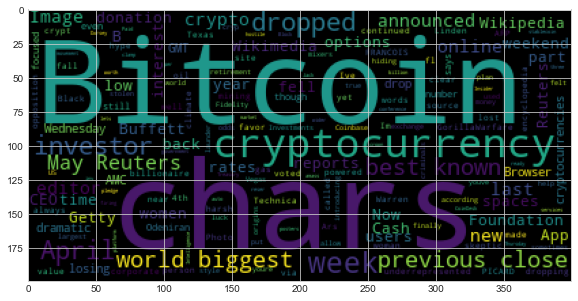

In [169]:
# Generate the Bitcoin word cloud
btc_text = ' '.join(btc_news_en_df.text)
wc = WordCloud().generate(btc_text)
plt.imshow(wc)


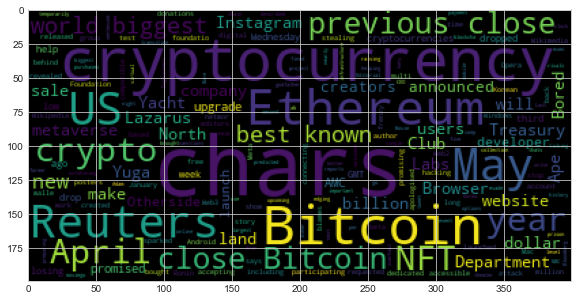

In [170]:
# Generate the Ethereum word cloud
eth_text = ' '.join(eth_news_en_df.text)
wc = WordCloud().generate(eth_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [157]:
import spacy
from spacy import displacy

In [158]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [159]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [160]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_news_en_df.text)
btc_text

'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars] A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars] Wikipedia editors have voted in favor of dropping cryptocurrency from the Wikimedia Foundation\'s donation options. As Ars Technica reports, an editor for the online encyclopedia called GorillaWarfare… [+1577 chars] Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars] Image source, Getty Images\r\nThe value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), accordin

In [173]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data['title'] = 'This is the BTC spaCy Analysis'

In [174]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [163]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text + ' ' + ent.label_)

Odeniran GPE
Linden GPE
Texas GPE
April 4th DATE
2022 DATE
FRANCOIS PICARD/AFP ORG
Getty Images ORG
Wikipedia ORG
the Wikimedia Foundation's ORG
Ars Technica PERSON
GorillaWarfare ORG
Warren Buffett PERSON
the weekend DATE
Buffett PERSON
Getty Images ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
April 12 DATE
Reuters ORG
$10 billion MONEY
Jack Dorsey PERSON
three CARDINAL
Cash App PERSON
Bitcoin 2022 DATE
Thursday DATE
CoinDesk ORG
Intelligence ORG
Cash App PERSON
18 CARDINAL
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
April 26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
Bitcoin PERSON
16% PERCENT
year DATE
+339 ORG
May 4 DATE
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
Bitcoin PERSON
20.9% PERCENT
year DATE
Bitcoin PERSON
Gucci PERSON
week DATE
Kristy Kilb

---

### Ethereum NER

In [164]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_news_en_df.text)
eth_text

'The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars] 18 with 15 posters participating, including story author\r\nMore than 200 long-time Wikipedia editors have requested that the Wikimedia Foundation stop accepting cryptocurrency donations.\xa0The foundatio… [+4016 chars] Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you\'ve bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars] Opera launched its dedicated "Crypto Browser" into beta back in January, promising to make Web3 as accessible as any Web2 website. The company released the browser for Windows, Mac and Android users … [+1563 chars] A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that tempor

In [175]:
# Run the NER processor on all of the text
# Run the NER processor on all of the text
ethereum_doc = nlp(eth_text)

# Add a title to the document
ethereum_doc.user_data['title'] = 'This is the Eth spaCy Analysis'

In [176]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [167]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)

The US Department of Treasury ORG
Lazarus PERSON
The US Treasury Department ORG
North Korean NORP
Lazarus ORG
$625 million MONEY
Ronin PERSON
18 CARDINAL
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
Meta ORG
Instagram ORG
US GPE
Instagram ORG
Crypto Browser PERSON
January DATE
Windows, Mac ORG
Android ORG
Ethereum ORG
Yuga Labs PERSON
Bored Ape Yacht Club PERSON
Yuga Labs PERSON
Otherside ORG
April 30 DATE
NFT ORG
Ethereum ORG
more than five years DATE
100,000 MONEY
North Korea GPE
US GPE
NBC News ORG
April 26 DATE
Reuters ORG
No.2 DATE
second ORDINAL
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
moviego GPE
the "Bored Apes Yacht Club LAW
Last night TIME
Bloomberg PERSON
nearly a third CARDINAL
a billion dollars MONEY
Early this week DATE
the Ukrainian Computer Emergency Response Team ORG
Slovakian NORP
Russia GPE
GRU Sandworm PERSON
40 days ago DATE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Ethereum ORG
Merge ORG
a few months

---